# Machine Learning Model Development


## 1 - Exploratory Data Analysis (EDA)


### Importing important libraries

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from collections import Counter
%matplotlib inline

### Importing the CSV file

After importing all the important libraries, the first step is to import the dataset to work on.

In [2]:
birds = pd.read_csv('birdbones/bird.csv')  # Read CSV file

### Data observation by EDA

The data set is observed and exploratory data analysis is performed to get important information like distribution and imbalance in the data, and correlation bettween features.

In [3]:
np.shape(birds) #Checking the shape of birds data

(420, 12)

In [4]:
birds.head() #tabular representation of first five rows

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,SW
1,1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,SW
2,2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,SW
3,3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,SW
4,4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,SW


The cell below will remove all the rows that have NA values in the dataset, because these rows are of no use to us in anyway. Also there are only 7 such rows so it does not effect the dataset as much.  

In [5]:
birds=birds.dropna(axis=0, how="any") #Removing the NA values
birds=birds.drop(['id'],axis=1)       #Removing id column as it is not important

In [6]:
np.shape(birds) # verify the new shape of data. Removed 7 columns.

(413, 11)

In [7]:
type(birds.type[1]) 
#Confirming the data types as seen in above table. probably need to do label encoding.

str

The above cell shows that the types of birds in the dataset are in string format. Best appoach is to change these into numerical labels. We would be using Label Encoding to do this.

In [8]:
type(birds.huml[1]) #Confirming the data types as seen in above table.

numpy.float64

The below cell shows all the important statistical information ofthe dataset. Important thing to notice is the mean values of the bone measues, and the standard deviations. These suggest that we should consider standardiziation of this dataset.(Will be discussed in preprocessing)

In [9]:
birds.describe() #Important stats observation of the data.

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,64.874867,4.381235,69.197409,3.606538,36.822446,3.221768,64.615642,3.182324,39.309806,2.944891
std,54.056078,2.861460,58.929490,2.190150,19.899356,2.021169,37.977929,2.084124,23.272704,2.194744
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.360000,2.200000,28.160000,1.870000,21.350000,1.720000,36.350000,1.560000,23.050000,1.430000
50%,44.180000,3.500000,43.710000,2.960000,31.090000,2.520000,51.880000,2.490000,31.740000,2.240000
75%,90.490000,5.820000,97.520000,4.770000,47.090000,4.110000,82.870000,4.250000,50.440000,3.520000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


### Pie chart - percentage of each class of birds in the dataset

The pie chart below shows the distribution of dataset with respect to the types of the birds. This shows clear imbalance in the dataset as two of the classes make around 58% of data while other four, the remaining 42%.

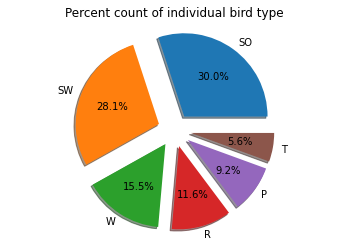

In [10]:
# Graphically represent the ecological bird types as a pie chart:
label=['SO','SW','W','R','P','T']
expld = 0.2*np.ones(6)
plt.pie(birds['type'].value_counts(), labels=label, explode=expld, shadow=True, autopct='%1.1f%%')
plt.title('Percent count of individual bird type')
plt.axis('equal')
plt.show()

In [11]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']
# The features of the birds bones

### Box plot - Relation of each bone measure with respect to each bird class

Another thing to observe is the trend of each bone measurement among different ecological classes of the birds to check if they are related to these measurements. This can be done by creating box plots between each bone measurement against each bird type. The results are interesting as they clearly show that the difference among the classes is very similar across the different bone measurements. The scansorial, singing and terrestrial birds have very small length and width of bones while the other three categories, raptors, swimming, and wading birds, have higher measure of bone length and width with greater variance. These results show high correlation between bone measurements and hence suggest classification method to solve this problem.

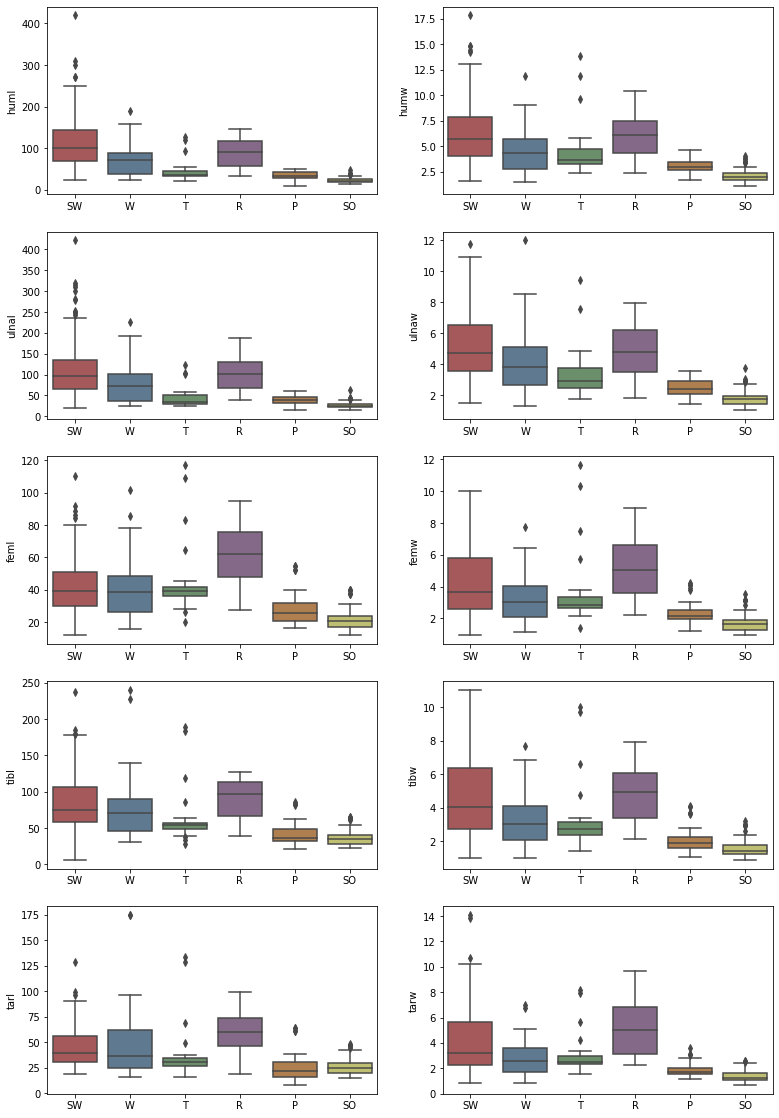

In [12]:
_, axes = plt.subplots(nrows=5, ncols=2, figsize=(13, 20))

for f, ax in zip(columns, axes.ravel()):
    _ = sns.boxplot(
        data=birds, 
        y=f, 
        x='type', 
        ax=ax, 
        palette=sns.color_palette("Set1", n_colors=6, desat=.5)
    )
    
    ax.set_xlabel("")

### Label encoding

The module LabelEncoder from Scikit Learn can be used to encode the bird types to numerical values.

In [13]:
label=LabelEncoder()
birds.type=label.fit_transform(birds.type)
birds.head() # The type of birds must be changed from  string type to encoded numbers. 

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
0,80.78,6.68,72.01,4.88,41.81,3.70,5.50,4.03,38.70,3.84,3
1,88.91,6.63,80.53,5.59,47.04,4.30,80.22,4.51,41.50,4.01,3
2,79.97,6.37,69.26,5.28,43.07,3.90,75.35,4.04,38.31,3.34,3
3,77.65,5.70,65.76,4.77,40.04,3.52,69.17,3.40,35.78,3.41,3
4,62.80,4.84,52.09,3.73,33.95,2.72,56.27,2.96,31.88,3.13,3


In [14]:
enc={
    'Original' : label.classes_,
    'Encoded'  : label.transform(label.classes_)
}
encoded=pd.DataFrame(enc)
encoded

,Original,Encoded
0,P,0
1,R,1
2,SO,2
3,SW,3
4,T,4
5,W,5


The cell above shows the encoded birds types.

## Removing outliers

To remove the outliers we will first separate ecah bird from the dataset and observe the datasets separately to see if any bone measurement is oddly big or small. Such rows will be removed as these are outliers. We have to do this as one type of bird might have different range of measuements than the other. 

### Bird type 0

In [15]:
bird_0 = birds[birds.type == 0]
bird_0.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.0
mean,34.423947,3.039211,39.177368,2.476316,28.217368,2.307895,41.881316,2.095789,25.787368,1.902632,0.0
std,9.399708,0.631918,11.638906,0.580305,10.613094,0.803836,17.146487,0.801430,14.836621,0.573452,0.0
min,9.850000,1.730000,14.730000,1.410000,16.270000,1.210000,20.890000,1.050000,7.770000,1.160000,0.0
25%,28.697500,2.660000,31.962500,2.067500,20.640000,1.980000,31.970000,1.632500,15.822500,1.532500,0.0
50%,33.800000,2.930000,38.555000,2.415000,25.400000,2.135000,36.650000,1.885000,21.895000,1.740000,0.0
75%,42.305000,3.492500,47.305000,2.900000,31.857500,2.505000,49.235000,2.282500,30.540000,2.057500,0.0
max,49.120000,4.640000,60.950000,3.520000,54.670000,4.250000,85.880000,4.120000,63.910000,3.600000,0.0


We can see that there is unexpected increse in the max values from 75% values for the lengths of femur, tibia and tarsometatarsus. We need to examine these for outlier precence.


In [16]:
# quantile() will show the values with percentile higher than the assighned quntile number (0.9 in this case)
bird_0[bird_0.feml>bird_0.feml.quantile(0.9)] 

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
257,42.52,2.99,36.73,2.91,52.24,3.81,81.57,3.71,61.27,2.71,0
258,45.60,3.35,38.73,3.52,54.45,4.10,83.59,3.72,63.91,2.67,0
259,43.97,3.54,38.38,3.14,52.49,4.25,83.15,4.12,61.08,3.04,0
260,46.38,3.41,39.80,3.48,54.67,4.08,85.88,4.04,63.75,3.09,0


In [17]:
bird_0[bird_0.tarl>bird_0.tarl.quantile(0.9)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
257,42.52,2.99,36.73,2.91,52.24,3.81,81.57,3.71,61.27,2.71,0
258,45.60,3.35,38.73,3.52,54.45,4.10,83.59,3.72,63.91,2.67,0
259,43.97,3.54,38.38,3.14,52.49,4.25,83.15,4.12,61.08,3.04,0
260,46.38,3.41,39.80,3.48,54.67,4.08,85.88,4.04,63.75,3.09,0


4 values of feml are greater than 50 the temaining are in 30's. But these values sseem to be legitimate as the values for other two bones lengths are also big for these which suggest that these values might be true. We do not need to remove any row from type 0.

### Bird type 1

In [18]:
bird_1 = birds[birds.type == 1]
bird_1.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.0
mean,87.185000,6.057708,100.077917,4.793542,61.700625,5.235208,89.806875,4.926667,59.145000,5.10000,1.0
std,32.164088,2.193202,38.163946,1.661351,18.203526,1.877284,26.844907,1.716675,19.296233,2.03482,0.0
min,33.120000,2.400000,39.850000,1.800000,27.460000,2.190000,38.990000,2.150000,19.100000,2.22000,1.0
25%,57.462500,4.360000,66.927500,3.485000,47.645000,3.592500,65.997500,3.382500,46.235000,3.14250,1.0
50%,89.880000,6.125000,102.370000,4.745000,62.315000,5.060000,96.360000,4.935000,60.105000,5.03000,1.0
75%,116.520000,7.510000,129.542500,6.190000,75.745000,6.590000,113.797500,6.105000,73.455000,6.82500,1.0
max,145.000000,10.370000,188.000000,7.920000,94.790000,8.920000,126.540000,7.900000,99.720000,9.64000,1.0


There is noty much change in the values and there is a high chance that there are no outliers in this bird type aswell

### Bird type 2

In [19]:
bird_2 = birds[birds.type == 2]
bird_2.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.0
mean,22.442661,2.036935,26.479113,1.749355,21.371532,1.678790,36.165726,1.540726,25.865242,1.348387,2.0
std,6.156546,0.554944,6.975962,0.476863,6.055828,0.502955,9.689100,0.485779,7.489141,0.419664,0.0
min,12.690000,1.140000,14.090000,1.000000,11.830000,0.930000,22.130000,0.870000,15.190000,0.660000,2.0
25%,18.687500,1.670000,22.220000,1.400000,17.265000,1.287500,28.630000,1.220000,20.012500,1.050000,2.0
50%,21.750000,1.945000,25.720000,1.715000,20.735000,1.640000,35.330000,1.425000,24.310000,1.265000,2.0
75%,25.370000,2.320000,29.277500,1.962500,24.020000,1.910000,40.375000,1.775000,29.647500,1.602500,2.0
max,48.200000,4.080000,61.940000,3.750000,40.110000,3.510000,64.970000,3.210000,48.350000,2.570000,2.0


Similar to the previous types, there are no out liers in this type of bird

### Bird type 3

In [20]:
bird_3 = birds[birds.type == 3]
bird_3.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.0
mean,110.251121,6.423966,111.755517,5.221638,42.169655,4.275776,85.317069,4.513534,45.156207,4.149914,3.0
std,66.225024,3.283262,75.889706,2.346272,18.141428,2.151396,39.840920,2.309153,20.896670,2.677063,0.0
min,22.630000,1.630000,20.750000,1.510000,12.210000,0.970000,5.500000,1.010000,18.420000,0.830000,3.0
25%,68.412500,4.062500,65.687500,3.537500,29.967500,2.572500,57.587500,2.712500,30.125000,2.245000,3.0
50%,100.065000,5.735000,96.935000,4.685000,39.325000,3.660000,75.275000,4.035000,39.695000,3.225000,3.0
75%,143.500000,7.877500,133.750000,6.540000,51.020000,5.810000,106.030000,6.377500,56.137500,5.630000,3.0
max,420.000000,17.840000,422.000000,11.720000,110.540000,9.990000,237.000000,11.030000,128.350000,14.090000,3.0


In [21]:
bird_3[bird_3.huml>bird_3.huml.quantile(0.935)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
33,210.0,13.03,278.0,10.74,56.87,8.03,76.66,5.20,22.54,7.16,3
38,272.0,14.86,320.0,10.42,91.60,9.71,132.00,10.23,81.77,8.91,3
39,270.0,14.25,310.0,10.90,86.20,9.96,125.76,9.63,79.18,10.05,3
56,310.0,14.40,315.0,9.51,88.77,8.10,180.00,9.45,96.13,7.69,3
57,250.0,11.91,252.0,8.31,73.04,7.37,160.00,8.47,82.46,7.04,3
58,420.0,17.84,422.0,11.72,110.54,9.99,237.00,11.03,128.35,8.93,3
59,250.0,11.28,247.5,7.50,69.04,6.20,156.00,7.19,83.36,6.13,3
60,300.0,12.48,300.0,8.65,84.05,8.53,178.00,9.61,99.01,7.55,3


The bird type 3 shows a lot of increse in the values between 75% and max value. When these bones are observed separately, these show the presence of outliers which are shown by above datraframe. We will delete these rows from the datset. One way to do this, is to remove these rows from the each dataset and then combine all the datasets to the original form. The other (and easier) way is to note the row number, and just remove it from the original datset. 

In [22]:
outliers=bird_3[bird_3.huml>bird_3.huml.quantile(0.935)]
# The quantile value is selected by hit and trial method. We are looking for outliers between 75% and 100%. 
# As soon as we see a drastic change in the measurement, we delete the values after that quantile.

### Birds type 4

In [23]:
bird_4 = birds[birds.type == 4]
bird_4.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.0
mean,45.699565,4.786087,45.617391,3.471739,46.277391,3.819565,66.090870,3.451739,40.086522,3.183913,4.0
std,28.068796,2.944815,27.230427,1.796931,24.507726,2.573380,41.865969,2.273169,30.708129,1.746846,0.0
min,20.250000,2.350000,25.140000,1.760000,20.170000,1.370000,27.670000,1.410000,15.680000,1.550000,4.0
25%,32.065000,3.290000,28.635000,2.430000,36.235000,2.645000,49.035000,2.380000,26.780000,2.340000,4.0
50%,34.240000,3.600000,35.240000,2.910000,39.380000,2.870000,53.770000,2.710000,31.000000,2.490000,4.0
75%,44.275000,4.715000,51.580000,3.765000,41.715000,3.365000,56.435000,3.155000,34.820000,2.945000,4.0
max,127.000000,13.790000,123.270000,9.420000,117.070000,11.640000,189.000000,10.030000,134.000000,8.190000,4.0


In [24]:
bird_4[bird_4.feml>bird_4.feml.quantile(0.9)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
197,92.82,9.60,100.58,7.57,82.94,7.47,118.24,6.61,69.16,5.66,4
201,118.75,11.90,104.68,4.77,108.85,10.29,183.00,9.69,134.00,7.96,4
202,127.00,13.79,123.27,9.42,117.07,11.64,189.00,10.03,128.50,8.19,4


The birds type 4 has the above outliers and will be stored in the outlier variable for deleting.

In [25]:
outliers=outliers.append(bird_4[bird_4.feml>bird_4.feml.quantile(0.9)])
# We also combine all the rows that have outliers in a separate data frame,
# so that we can use their index numbers to delete them from the actual dataset.

### Birds type 5

In [26]:
bird_5 = birds[birds.type == 5]
bird_5.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,73.081563,4.614844,77.965625,4.106719,40.119531,3.118594,76.290938,3.190156,47.635469,2.770625,5.0
std,38.139195,2.138560,46.897278,1.948194,17.655380,1.409339,41.382712,1.485697,31.617301,1.338460,0.0
min,22.390000,1.530000,24.160000,1.290000,15.710000,1.140000,30.310000,0.990000,15.800000,0.830000,5.0
25%,38.502500,2.780000,36.140000,2.615000,26.555000,2.075000,46.112500,2.060000,24.597500,1.707500,5.0
50%,70.470000,4.355000,72.785000,3.825000,38.410000,3.020000,71.245000,3.010000,36.940000,2.555000,5.0
75%,89.092500,5.677500,102.217500,5.077500,48.232500,4.042500,90.007500,4.120000,61.800000,3.585000,5.0
max,190.000000,11.920000,225.000000,12.000000,101.750000,7.750000,240.000000,7.710000,175.000000,7.000000,5.0


In [27]:
bird_5[bird_5.feml>bird_5.feml.quantile(0.96)]

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
116,157.00,9.00,192.00,7.02,85.60,6.44,227.0,6.84,175.00,6.77,5
117,190.00,11.92,225.00,8.55,101.75,7.75,240.0,7.71,175.00,7.00,5
120,118.52,6.87,134.91,5.06,78.20,5.24,132.0,5.38,85.28,4.74,5


In [28]:
outliers=outliers.append(bird_5[bird_5.feml>bird_5.feml.quantile(0.96)])

In [29]:
index=outliers.index # Getting the index of rows with outliers.

In [30]:
len(index)# We will be deleting 14 rows from the data set,  
          # 21 in total if we include the 7 rows with NA values that were deleted before.

14

In [31]:
np.shape(birds) # Shape before removing outliers

(413, 11)

#### Drop the rows with above indexes

In [32]:
birds.drop(index, axis=0, inplace=True) # Deleting the 14 rows with outliers.

In [33]:
np.shape(birds) #Checking the shape of birds data after outlier removal

(399, 11)

### Train-Test Split

For machine learning models, a standard practice is to separate a percentage of the data, usually 20%, for testing and using the remaining data for training, so that the model is tested on 'unseen' data to avoid biasness. In this task a module called **'train_test_split'** is used to dive the train and test data in 80-20 ratio. A random state is selected for the split which is helpful if the same results are to be recreated again. In this case a random state of 20 is used.
Moreover we need to do the split before balancing the the data and oversample only the train set so it does not bias the model.

In [34]:
columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(birds[columns],birds.type,
                                                    test_size=0.2, 
                                                    random_state=15)#test size is 20%, tain size is 80%.

### Balancing the data set

As we know now, the data is highly imbalanced. We need to oversample the data to balance it. This can be done using a module called imblearn and specifically the smote module.

In [36]:
X=X_train
Y=y_train
X_train,y_train=SMOTE().fit_resample(X,Y) # Calling the SMOTE function from Imbalance learn 

In [37]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({2: 97, 3: 89, 5: 52, 1: 37, 0: 27, 4: 17})
Resampled dataset shape Counter({3: 97, 0: 97, 5: 97, 1: 97, 4: 97, 2: 97})


### Bar graph - graphical representation of the balancing step

Text(0, 0.5, 'Frequency')

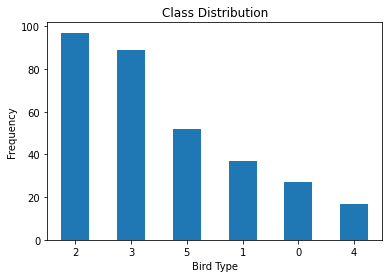

In [38]:
count_classes = pd.value_counts(Y, sort = True)
count_classes.plot(kind = 'bar', rot=0)         # Plotting the unbalanced dataset
plt.title("Class Distribution")
plt.xlabel("Bird Type")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

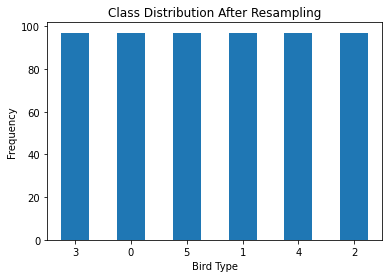

In [39]:
count_classes = pd.value_counts(y_train, sort = True)
count_classes.plot(kind = 'bar', rot=0)         # Plotting the balanced dataset
plt.title("Class Distribution After Resampling")
plt.xlabel("Bird Type")
plt.ylabel("Frequency")

### Heat map - Correlation check

An important thing is the relation between the bone features of different birds and see if they have any similarity or not. This can be done using a correlation matrix. A visual representation of the matrix in the form of a heat map is shown below. It is obvious from the heat map that the bones are highly related to each other and it also makes sense as big birds have large and wide bones and small birds have relatively smaller and less wide bones.

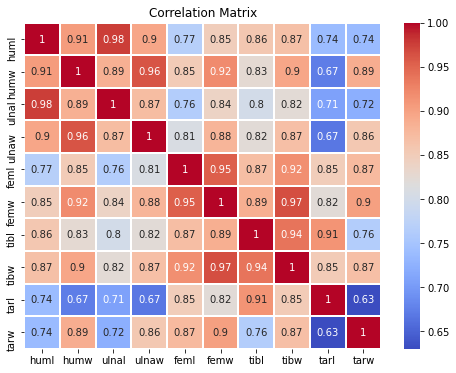

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr(),cmap='coolwarm',annot=True,linewidths=.1)
plt.title('Correlation Matrix')
plt.show()

The heat map again shows how the individual bone measurements are highly correlated. We can try using feature engieering technique of removing the higly correlated features to avoid overfitting. 

The above script will take a threshold value (typicall 85%) to see which featres are highly correlated and can be removed. But in this case we can see from the correlation matrix taht Ulna measures do not play much role in learning of the model so we will just drop ulna measurements.

In [41]:
X_train = X_train.drop({ 'ulnal', 'ulnaw'},axis=1)   # Drop the 2 features of ULNA from train sample

In [42]:
X_test  = X_test.drop({ 'ulnal', 'ulnaw'},axis=1)   # Drop the 2 features of ULNA from test sample  

In [43]:
np.shape(X_train)

(582, 8)

Even trying the abvoe script for threshold value of 95% will not be useful as it reduces the three very important features. This way we would not be left with a good dataset. So we will have to use hyperparameter optimization techniques to reduce the overfitting if it happens.

### Pair plot - to observe the distribution of the data points.

Let us have a look at our data set to see if these models would be applicable to the models of our choice. For this
purpose we can use the pair plot from seaborn library. The pair plot will plot all the features of the data i.e. each bone length and width compared to each other. The pair plot is shown below.

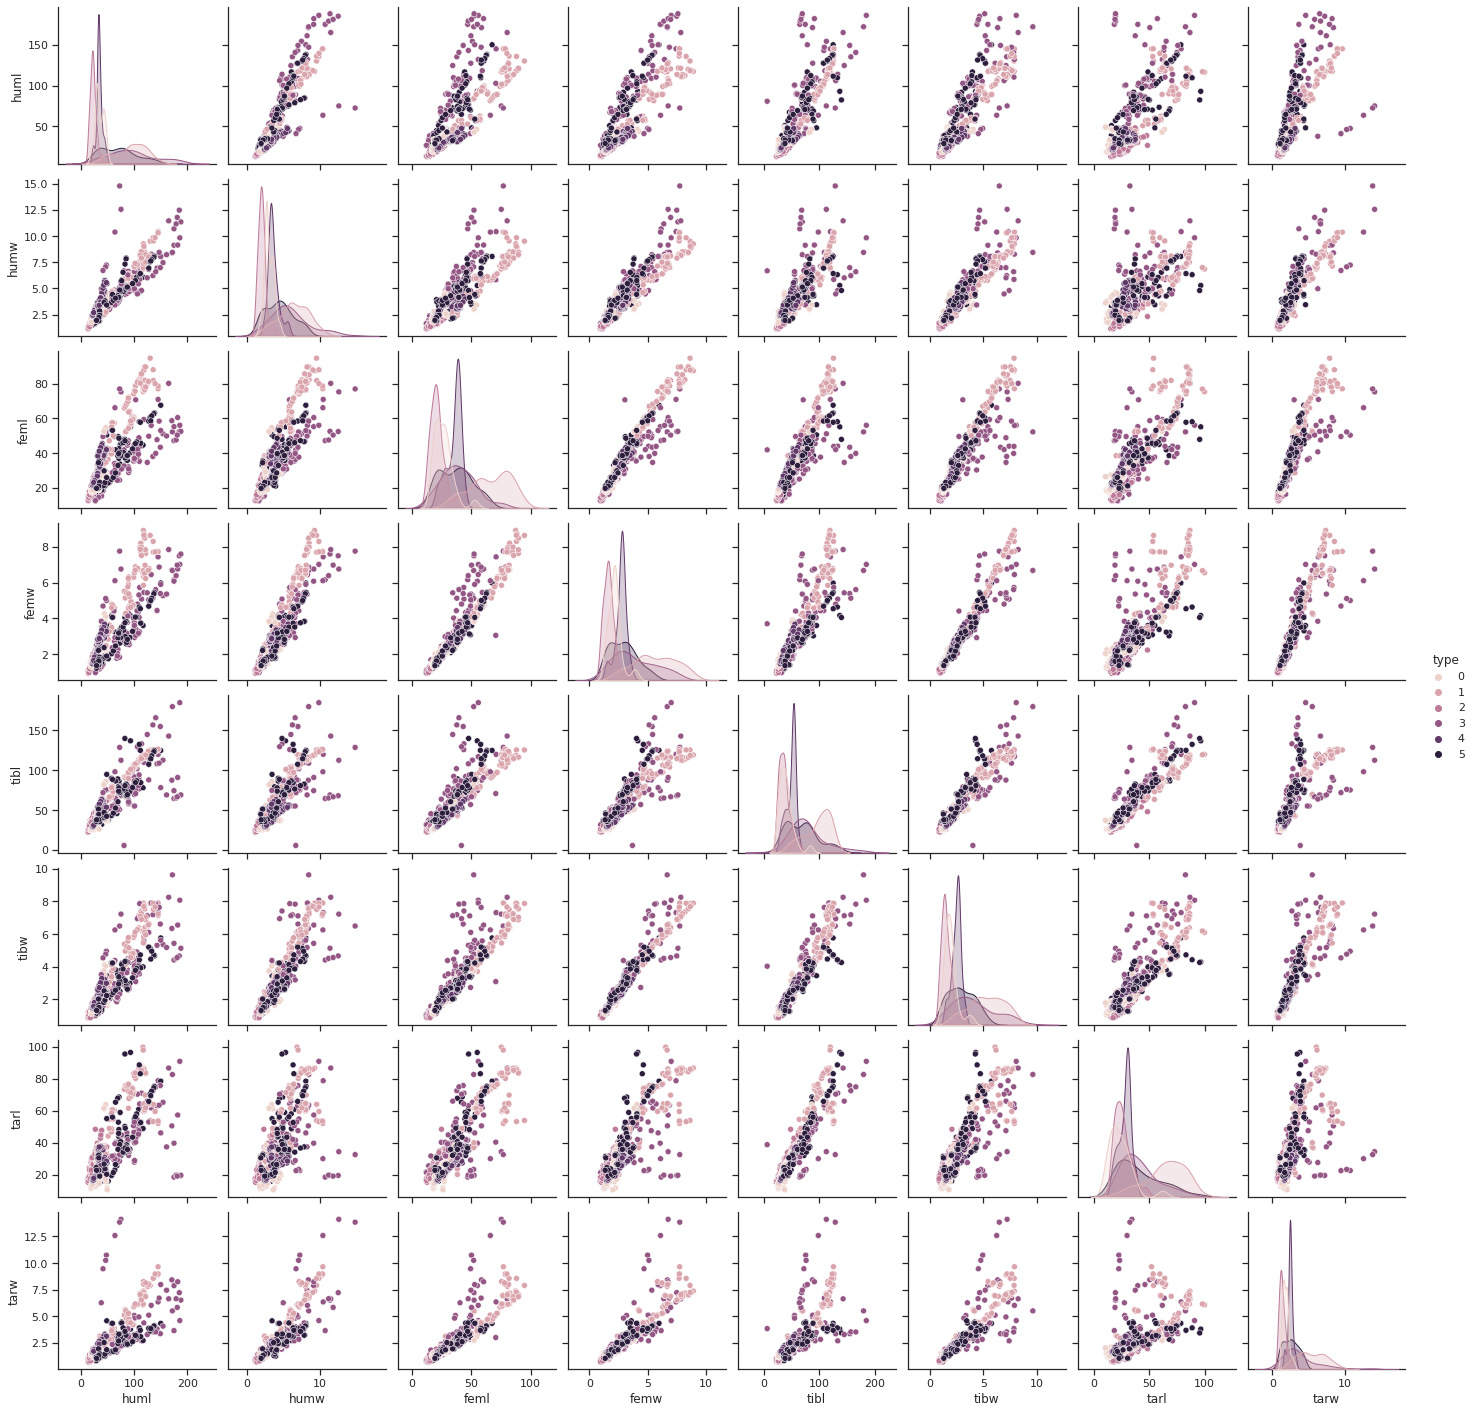

In [44]:
data = X_train.copy(deep = True)
data['type'] = y_train
sns.set_theme(style = "ticks")
sns.pairplot(data, hue = "type")

One of the plots is plotted separately below to have a better view of the distribution.

<AxesSubplot:xlabel='tibl', ylabel='feml'>

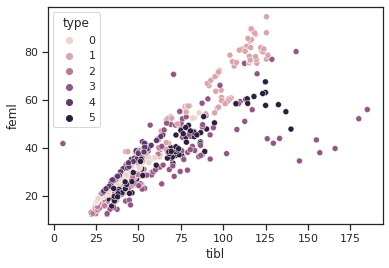

In [45]:
sns.scatterplot(data=data,x='tibl',y='feml',hue='type')

The plot shows each class of bird with an assorted color and compares the length of the femur with the tibia length. From the data we can see that, it is possible to do classification using the logistic regression model on this data set. At first it looks like the classes are too much overlapping but, we have to consider the fact that the one vs. rest method will consider all data points other than one class as a single class at one time and do this process for each class to get the best probability prediction. The other two models will also be able to classify all the classes easily. The SVM is known to work fine in cases where there is apparent overlapping as it will use one vs. one method and the hyper planes created could be in any dimension, as long as it separates the boundary between the two classes. The KNN model will be calculating the distance of close points to the test point in the data. The points are close, suggesting we would be taking a small value of K as the distance between points would be low. One important thing to observe is the trend in the data points for each class. Each bone measurement is highly correlated. We can see that, with increasing length, the width of the bone increases as well. The trend in the bones measurements increases from left to right and the gap in different classes starts to increase. This is extremely helpful in case of logistic regression as it will help in creating the class boundaries.

## 2 - Pre-processing

### Label encoding and Balancing

Although encoding and balancing is pre-processing step, we have already discussed iun the EDA part so we will not need to do it again.

### Standardization

Standardization is a very important step in most machine learning tasks. Some people just standarize their data without even knowing if it is needed or not. Standardization is done if the two feature values have huge difference in value or they are completely different quantities for example, weight in lbs and height in cm are completely diffrent quantities and choosing a distance based model, like SVM, will compleetlely a bias the training towards the distance based feature. For this purpose, we will have to observe the dat again to see if we need standardization or not.

In [46]:
pd.DataFrame(data.describe().iloc[1:2,0:10])

,huml,humw,feml,femw,tibl,tibw,tarl,tarw,type
mean,58.209442,4.235932,37.626017,3.170622,61.145261,3.055773,37.452698,2.915734,2.5


The above cell shows the mean value of each bone measurment and it is clear that the lengths of the bones are a multiple of 10 and range in 30's and 60's while the widths are multiple of 1 and are all below 5. This is a big difference in value and we will need to scale these values. Standard scalar will subtract the mean from each value and divide it by standard deviation to getr scaled values as shown below. 

In [47]:
from sklearn.preprocessing import StandardScaler
# initialise standard scaler object
columns = ['huml', 'humw', 'feml','femw','tibl', 'tibw', 'tarl', 'tarw']
# The features of the birds bones
scaler = StandardScaler()
scaler.fit(X_train[columns])
scaled_features_Train = scaler.transform(X_train[columns])
scaler.fit(X_test[columns])
scaled_features_Test = scaler.transform(X_test[columns])

X_train = pd.DataFrame(scaled_features_Train,columns=columns)
X_test  = pd.DataFrame(scaled_features_Test,columns=columns)

## 3 - Model Training

For model training, we will be selecting three models and train them first to observe their performance. After that we can tune the hyperparameters to get the best performance from each model and see which model gives the greatest performance of the three.

The models chosen for this task are:
###### 1- Logistic Regression.
###### 2- Support Vector Machine.
###### 3- K-Nearest Neighbors.

### Logistic Regression

In logistic regression, the model decides the outcome as a binary output i.e. whether it is a specific bird or not. In our case we have six classes. So we will be using a multiclass logistic regression classifier which is sometimes also called as a ‘one vs. rest’ classifier. In this type of model, one of the classes is compared to rest of the class creating multiple models for each class, which predicts the probability of that class. The model with highest probability of a class is decided and its prediction is taken as the class prediction. To use one ovs. rest feature, we use a hyperparameter multi_class = 'ovr' as shown below.

In [48]:
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression(max_iter=1000,multi_class='ovr',random_state=4)

In [49]:
model_logistic.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', random_state=4)

#### Evaluation

To Evaluate our model we will use Confusion matrix and using the values in the confusin matrix we will calculate some important metrics that will help us understand the performance of the model.

As the specificity is not available in the metrics from SKlearn we have to create our own function to calculate it. The formula to calculate the specificity is;

&emsp;
    $$Specificity =  \displaystyle \Bigg[\frac{ True Negative}{True Neagative + False Positive}\Bigg]$$

Along with specificity we can also caculate the loss too using the following formula;

&emsp;
    $$Loss =  \displaystyle \Bigg[\frac{ False Positive + False Negative}{Total  Number  Of  Predictions}\Bigg]$$


In [50]:
def specificity (conf_matrix):
    Spec_per_class=[]
    loss=0
    Los=[]
    Specificity=0
    dia=np.sum(np.diag(conf_matrix))
    for i in range(6):
        TP = conf_matrix[i][i]         # True Possitives
        sum=0
        for j in range(6):
            sum=sum+conf_matrix[j][i]   
        FP = sum-TP                    # False Possitives
        TN = dia-TP                    # True Negatives
        FN = np.sum(conf_matrix[i])-TP # False Negatives
        spec=TN/(TN+FP)                # Specificity
        Specificity=spec+Specificity
        Spec_per_class.append(spec)
        loss=(FP+FN)/(FP+FN+TP+TN)     # Also calculated loss
        Los.append(loss)    
    Loss=np.sum(Los)/6
    Avg_Specificity = Specificity/6    # Taking average value
    classes=['P','R','SO','SW','T','W']
    Spec_per_class=pd.DataFrame(data=Spec_per_class,index=classes,columns=['Specificity'])
    
    
    return(Avg_Specificity,Spec_per_class,Loss)

###### Confusuion matrix

The confusion matrix shows a comparison of expected/real target values to the predicted target values. In this case, we are going to represent the confusion mtrix, both in the form of number of predictions and percentages to make it moreunderstandable.

<AxesSubplot:>

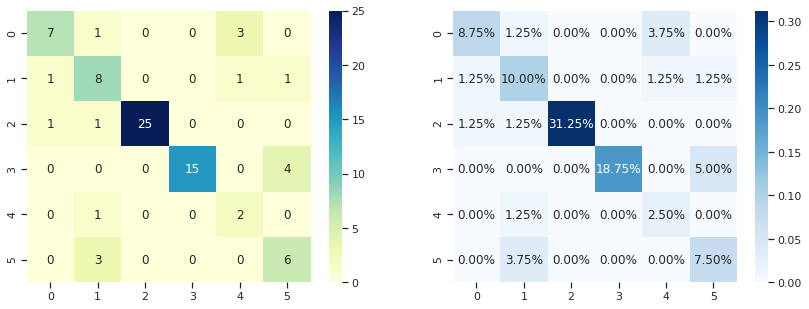

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_logistic.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

The matrix on the left shows that 7 of the Scansorial birds are predicted correctly from the test set while at one instance it is predicted as Raptor bird, and three times as a Terrestrial bird (False Negative). Also at three separate instances, other birds are wrongly predicted as Scansorial (False Positive). Similarly other predictions can also be observed from this confusion matrix. 

On the right matrix, these values are represented in the form of percentage of the data from test set. 

###### Classification Report

To view the metrics like precision, recall and F1 score are very important to understand the actual performance in addition to the accuracy. 
* Precision is the measure of True Positives among the total positive predictions.
* Recall is the measure of True Positives among the actual possitive entries (either predicted positive or not)
* F-1 Score is the harmonic mean of the Precision-Recall values.
* Accuracy is ratio of all the True preditions to the total number of predictions.
* Specificity is the measure of the True Negatives among the actual Negative entries (either predicted positive or not)

In [52]:
print(classification_report(y_test,model_logistic.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.78      0.64      0.70        11
           R       0.57      0.73      0.64        11
          SO       1.00      0.93      0.96        27
          SW       1.00      0.79      0.88        19
           T       0.33      0.67      0.44         3
           W       0.55      0.67      0.60         9

    accuracy                           0.79        80
   macro avg       0.70      0.74      0.70        80
weighted avg       0.83      0.79      0.80        80



In [53]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.95
Loss = 0.081

Class     Specificity
P          0.96
R          0.90
SO         1.00
SW         1.00
T          0.93
W          0.91


The classification report for the logistic Regression model shows that the model has 81% accuracy.
The precision values are not that bad, and our main concern here is also not the precision, but the Recall. As we know, Recall tells us the number of true positive predictions out of all the posstive predictions in the set. Thus a higher value of recall will mean higher value of True positives and lower value of False negatives. In this task our main goal is to have True Positive rate as high as possible. The high precision means high True positive rate as compared to all positive predictions which also include false positives. But our main goal does not concern false negatives. We will also consider f-score as a metric as it is the harmonic mean of Precion and recall. 
From confusion matrix, we know 7/11 scansorial birds are correctly classified giving us a recall of 0.64. Similarly, All terestrial birds are predicted correclty so we have a recall of 1. We see that the Avg. F1 Score of this model is 0.74, which is the average of harmonic mean of precion and recall.

In a similar fashion, we can observe the performance of the other classes as well. The specificity of each classs is also given and the average comes out to be 96%.

### Support Vector Machine

In SVM, the main goal is to create a hyper-plane that separates the two classes such that the distance between the hyper-plane and the closest training data point is maximum.Basically SVM is a binary classification problem, but
there are some methods used to solve multiple class problems using SVM. The standard way to do this is divide the data points into dichotomies. Oneof the methods involves dividing the classes such that one class is compared with all the remaining data points which is basically the concept of ‘one vs. rest’ method as explained in the logistic regression model. We will use the support vector classifier (SVC) from Scikit learn SVM module.

In [54]:
from sklearn import svm
model_svm=svm.SVC()
model_svm.fit(X_train,y_train)

SVC()

#### Evaluation

<AxesSubplot:>

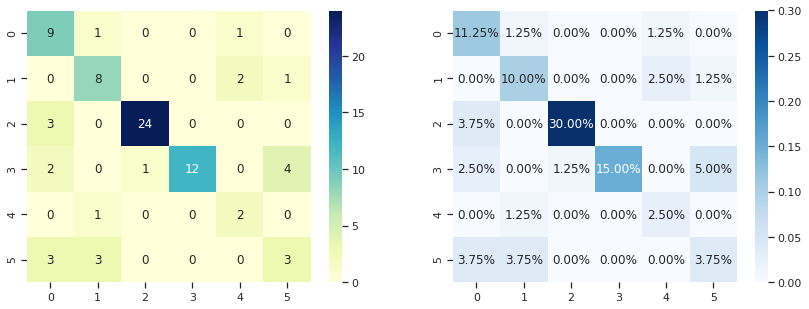

In [55]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_svm.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

In [56]:
print(classification_report(y_test,model_svm.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.53      0.82      0.64        11
           R       0.62      0.73      0.67        11
          SO       0.96      0.89      0.92        27
          SW       1.00      0.63      0.77        19
           T       0.40      0.67      0.50         3
           W       0.38      0.33      0.35         9

    accuracy                           0.73        80
   macro avg       0.65      0.68      0.64        80
weighted avg       0.78      0.72      0.73        80



In [57]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.93
Loss = 0.111

Class     Specificity
P          0.85
R          0.90
SO         0.97
SW         1.00
T          0.94
W          0.91


As explained in the previous section, 60% of Scansorial birds were precise and recall was found to be 82%. This means 9 out of 11 scansorial birds are correctly classified and the remaining two were wrong predictions. These false predictions come out as raptor and a terstrial bird from the confusion matrix. The average recall is 69% and which is not a good value and will be inceased when we do hyperparameter tuning. F1 Score shows no different result than the precion and recall, standing at a low value of 65%. The accuracy of the model is observed to be 74%. The above classification report can be reffered to see the precision and recall of other bird types.

### K-Nearest Neighbors

In KNN, the distance of the test data point is measured from K number of training points of different classes and the class with greatest number of close points is taken as the predicted class. The distance could be Euclidian distance or Manhattan distance.

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Evaluation

<AxesSubplot:>

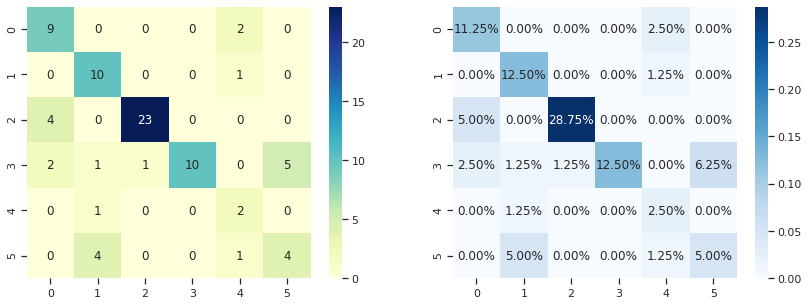

In [59]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix = confusion_matrix(y_test,knn.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])


In [60]:
print(classification_report(y_test,knn.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.60      0.82      0.69        11
           R       0.62      0.91      0.74        11
          SO       0.96      0.85      0.90        27
          SW       1.00      0.53      0.69        19
           T       0.33      0.67      0.44         3
           W       0.44      0.44      0.44         9

    accuracy                           0.73        80
   macro avg       0.66      0.70      0.65        80
weighted avg       0.79      0.72      0.73        80



In [61]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.93
Loss = 0.112

Class     Specificity
P          0.89
R          0.88
SO         0.97
SW         1.00
T          0.93
W          0.91


The KNN model shows 71% avg precision and 75% average recall with an accuracy of 78%. The average specificity of this model is 95% and the F1 score is at 70%.

## 4 - Hyper-parameter tuning

The hyperparameters are used to increse the performance of the model and for each model a number of hyperparameters can be used. A few of these hyperparameters for the discussed models are discused below;

###### Logistic Regression

An important hyperparameter for LR model is max_iter which is used to select the maximum number of iterations. Solver hyperparameter is used to select the algorithm to optimize the problem. Some solvers are ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, and ‘saga’. Our data is not that big and the solver used for smaller datasets is ‘liblinear’. ‘liblinear’ solver also uses a hyperparameter called penalty. The default parameter for penalty is ‘L2’, which we can change to see the performance of the model. Another hyperparameter C is available that is the inverse of regularization strength. A small value of C will provide greater regularization.

###### SVM

The separation of the data points is based on the kernel selected. There are ‘Linear’, ‘Polynomial’, ‘Gaussian’, ‘Radial Basis Function’, and ‘Sigmoid’ kernels available. The hyperparameter ‘C’ is help reduce misclassification of training samples and is used in all types of the kernels. Lower value of ‘C’ tends to smooth the decision surface, whereas a higher value ‘C’ tries to classify at all training samples correctly. Another hyperparameter called ‘gamma’ is used which defines the effect of each training data point. For data points very close, larger ‘gamma’ value is selected and vice versa.

###### KNN
The type of distance to be calculated is set by using the ‘p’ hyperparameter. For Euclidian distance p = 2 and for
Manhattan distance p = 1. To decide the number of neighbors to which the distance is to be measured, the
hyperparameter ‘n_neighbors’ is used. An interesting way to tune this parameter is to plot an accuracy rate vs K-value graph at different values of K. By observing the trend of this graph we can see if a higher value of K is more
effective or a lower value. (The plot is shown below and is generated in another notebook when testing KNN separately, we will be using Grid Search method in this notebook)

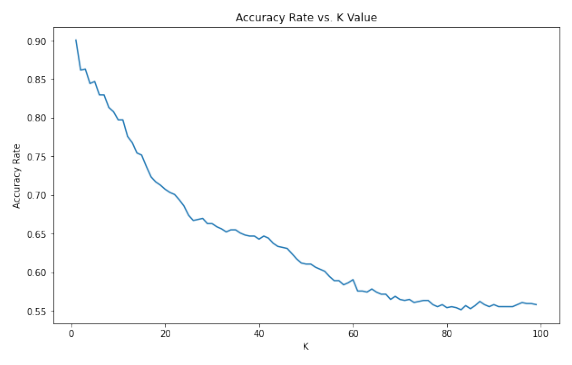

In [62]:
from matplotlib import image as mpimg

plt.figure(figsize=(10,8))
image = mpimg.imread("Accuracy.png")
plt.axis('off')
plt.imshow(image)

Increasing K value, reduces accuracy in our case. We will see this when we perform grid search on different parameters.

We will also use parameters like algorithm ({‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’) which is used in distance clculation, and weight with possible values {‘uniform’, ‘distance’}, which is used in prediction. 

## GridSearchCV

GridSearchCV is takes as input, the hyperparameters and models, tries all the combinations and return the set of hyperparameters that give the best result. The metric for the best result is selected to be Recall as we are more interested in recall than accuracy. This method, though slow, helps a lot in selecting the model hyperparameters and for a problem like ours, with a small data set we can easly use this method.

In [63]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'random_state':[4],
            'penalty':[ 'l2', 'elasticnet'],
            'C': [0.1,1,10],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga','newton-cholesky'],
            'multi_class':['ovr']
        }
    },  
    'svm': {
        'model': svm.SVC(),
        'params' : {
            
            'random_state':[4],
            'gamma':[0.0001,1,10,'scale'],
            'C': [1,10,100],
            'kernel':['poly','linear','sigmoid','rbf']
        }  
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors':[1,2,3,4,5],
            'weights': ['uniform', 'distance'],
            'p':[1,2],
            'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
            
        }
    }     
}

In [64]:
import warnings
warnings.filterwarnings('ignore')      # To ignore all the warnings and keep space clean 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5,scoring='recall_macro', return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_params'])    #Save the patameters in a pandas dataframe 
df

,model,best_params
0,logistic_regression,"{'C': 10, 'multi_class': 'ovr', 'penalty': 'l2..."
1,svm,"{'C': 100, 'gamma': 1, 'kernel': 'rbf', 'rando..."
2,knn,"{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2..."


The above dataframe shows the best hyperparameters for the three models chosen. In the next step, we will put these hyperparameters to these models and see the actual performance of each model.

### Tuned Model Training

### Logistic Regression

Lets start by training the LR model using the best hyperparameters that were calculated by grid search. These parameters were as follow;

In [65]:
df.best_params[0] # The best hyper parameters for Logestic Regression model

{'C': 10,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 4,
 'solver': 'newton-cg'}

All solvers do not support l1 penaltay that is why it is not used in grid search. I have tried it separately but it does not out perform l2 in this case

In [66]:
model_logistic=LogisticRegression(penalty='l2',solver='sag',C=1,multi_class='ovr',random_state=4)
model_logistic.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', random_state=4, solver='sag')

<AxesSubplot:>

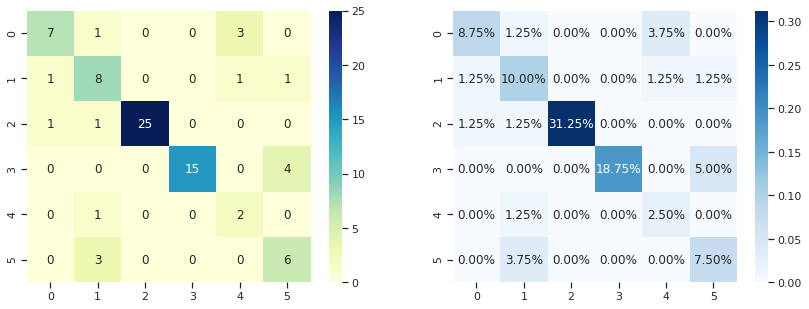

In [67]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_logistic.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

In [68]:
print(classification_report(y_test,model_logistic.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.78      0.64      0.70        11
           R       0.57      0.73      0.64        11
          SO       1.00      0.93      0.96        27
          SW       1.00      0.79      0.88        19
           T       0.33      0.67      0.44         3
           W       0.55      0.67      0.60         9

    accuracy                           0.79        80
   macro avg       0.70      0.74      0.70        80
weighted avg       0.83      0.79      0.80        80



In [69]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.95
Loss = 0.081

Class     Specificity
P          0.96
R          0.90
SO         1.00
SW         1.00
T          0.93
W          0.91


In [70]:
# Get the values from classification report as a dictionary to plot the graphs.
metric_dict_LR= classification_report(y_test,model_logistic.predict(X_test),output_dict=True)
# Assignimg the important metrics variables so they can be used in plotting
Precision_LR  = round(metric_dict_LR['macro avg']['precision']*100)
Recall_LR     = round(metric_dict_LR['macro avg']['recall']*100)
Specificity_LR= round(Avg_specificity*100)
F1_LR         = round(metric_dict_LR['macro avg']['f1-score']*100)
Accuracy_LR   = round(metric_dict_LR['accuracy']*100)
Loss_LR       = (Loss*100)

Observing the classification report for logistic regression model shows that the results emain the same, either we use solver sag or lbfgs. This is the best recall that we get using logistic regression,ie 81%.

### SVM

The training for SVM model is now done by using the best hyperparameters that were calculated by grid search. These parameters were as follow;

In [71]:
df.best_params[1]

{'C': 100, 'gamma': 1, 'kernel': 'rbf', 'random_state': 4}

###### Training the model

In [72]:
model_svm=svm.SVC(C=100,kernel='rbf',gamma = 1, probability=True,random_state=4)
model_svm.fit(X_train,y_train)

SVC(C=100, gamma=1, probability=True, random_state=4)

#### Using the gamma value as found by the GridSearch does give us a higher accuracy value, but our aim in this task is not just to create a high accuracy model but also have a lower false possitive rate, i.e. a higher precision value. Using a small value of gamma will ensure that the precision is higher, even though it reduces the model accuracy by 4%. The precision increases from 25% to 67%.

###### Evaluation

<AxesSubplot:>

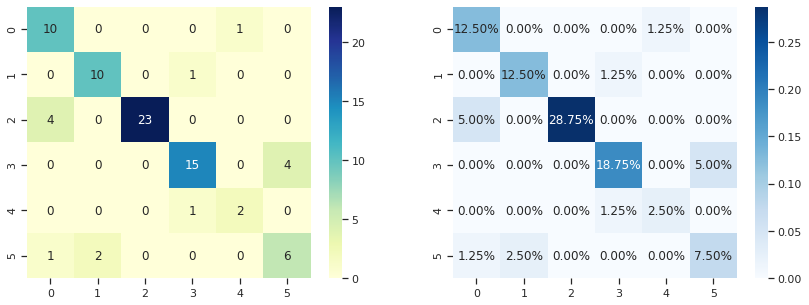

In [73]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix=confusion_matrix(y_test,model_svm.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])

In [74]:
print(classification_report(y_test,model_svm.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.67      0.91      0.77        11
           R       0.83      0.91      0.87        11
          SO       1.00      0.85      0.92        27
          SW       0.88      0.79      0.83        19
           T       0.67      0.67      0.67         3
           W       0.60      0.67      0.63         9

    accuracy                           0.82        80
   macro avg       0.77      0.80      0.78        80
weighted avg       0.85      0.82      0.83        80



In [75]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.96
Loss = 0.065

Class     Specificity
P          0.91
R          0.96
SO         1.00
SW         0.96
T          0.98
W          0.93


In [76]:
metric_dict_SVM= classification_report(y_test,model_svm.predict(X_test),output_dict=True)

Precision_SVM  = round(metric_dict_SVM['macro avg']['precision']*100)
Recall_SVM     = round(metric_dict_SVM['macro avg']['recall']*100)
Specificity_SVM= round(Avg_specificity*100)
F1_SVM         = round(metric_dict_SVM['macro avg']['f1-score']*100)
Accuracy_SVM   = round(metric_dict_SVM['accuracy']*100) 
Loss_SVM       = (Loss*100)

All the values for precision and recall have increased which tell us that the model has become better at predicting true positives and true negatives. The values of false predictions have lowered. We can also compare the test accuracies of the model from before and after hyperparameter tuning. The test accuracy has improved from 74% to 86% which is a considerable increase in performance.The recall of the model has increased from 69% to 81%. Also the loss has decreased by more than 5%. Avg specificity is increased too.

### KNN

Now lets train the KNN model using the best hyperparameters that were calculated by grid search. These parameters were as follow;

In [77]:
df.best_params[2]

{'algorithm': 'auto', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [78]:
knn = KNeighborsClassifier(algorithm='auto',n_neighbors=1,p=1,weights='distance')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1, weights='distance')

<AxesSubplot:>

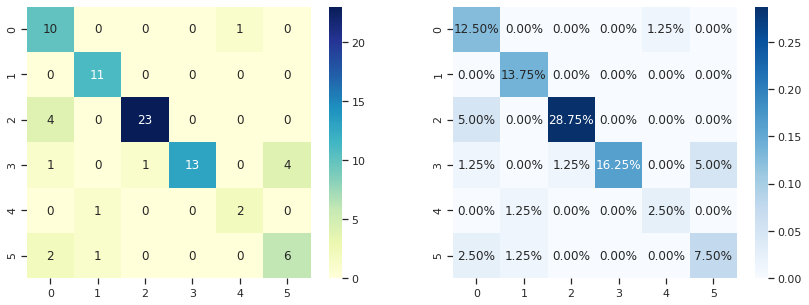

In [79]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

cf_matrix = confusion_matrix(y_test,knn.predict(X_test))

sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu',ax=axes[0])

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues',ax=axes[1])


In [80]:
print(classification_report(y_test,knn.predict(X_test),target_names=label.classes_))

              precision    recall  f1-score   support

           P       0.59      0.91      0.71        11
           R       0.85      1.00      0.92        11
          SO       0.96      0.85      0.90        27
          SW       1.00      0.68      0.81        19
           T       0.67      0.67      0.67         3
           W       0.60      0.67      0.63         9

    accuracy                           0.81        80
   macro avg       0.78      0.80      0.77        80
weighted avg       0.85      0.81      0.82        80



In [81]:
Avg_specificity,Spec_per_class,Loss=specificity(cf_matrix)
print('Average Specificity = %.2f'% Avg_specificity)
print('Loss = %.3f'% Loss)
print('\nClass',((Spec_per_class*100).astype(int))/100)

Average Specificity = 0.96
Loss = 0.070

Class     Specificity
P          0.88
R          0.96
SO         0.97
SW         1.00
T          0.98
W          0.93


In [82]:
import math
metric_dict_KNN= classification_report(y_test,knn.predict(X_test),output_dict=True)

Precision_KNN  = round(metric_dict_KNN['macro avg']['precision']*100)
Recall_KNN     = round(metric_dict_KNN['macro avg']['recall']*100)
Specificity_KNN= round(Avg_specificity*100)
F1_KNN         = round(metric_dict_KNN['macro avg']['f1-score']*100)
Accuracy_KNN   = round(metric_dict_KNN['accuracy']*100)
Loss_KNN       = (Loss*100)

Observing the classification report for KNN shows a visable increase in the Precision and Recall of the model with accuracy increased from 82% to 88%, precision from 76% to 80% and Recall from 78% to 82%. This means that the model has become better at detecting true possitive predictions overall. The f-1 score has also increased by 4%. The specificity now is 97% as comapared t o the previous 96%. The loss is now 4.5% compared to the previous 6.5%.

## Conclusion

After hyperparameter tuning we observed the performance of the three models to decide which gives the best outcome and be deployed to use for our original task. The performance metrics from the three models are stored in the form of a dataframe and are ploted to visualize the performances.

In [83]:
Perf={
    'Model'               : ['LR','SVM','KNN'],
    'Average_Precision'   : [Precision_LR,Precision_SVM,Precision_KNN],
    'Average_Recall'      : [Recall_LR,Recall_SVM,Recall_KNN],
    'Accuracy'            : [Accuracy_LR,Accuracy_SVM,Accuracy_KNN],
    'Loss'                : [Loss_LR,Loss_SVM,Loss_KNN],
    'Average_Specificity' : [Specificity_LR,Specificity_SVM,Specificity_KNN]
}
performance = pd.DataFrame(Perf)
performance

,Model,Average_Precision,Average_Recall,Accuracy,Loss,Average_Specificity
0,LR,70,74,79,8.143879,95
1,SVM,77,80,82,6.543166,96
2,KNN,78,80,81,7.040806,96


It is obvious from the dataframe above that KNN gives the best performance and LR the least. The same thing is observed in the plots below:

Text(0.5, 0, 'Model')

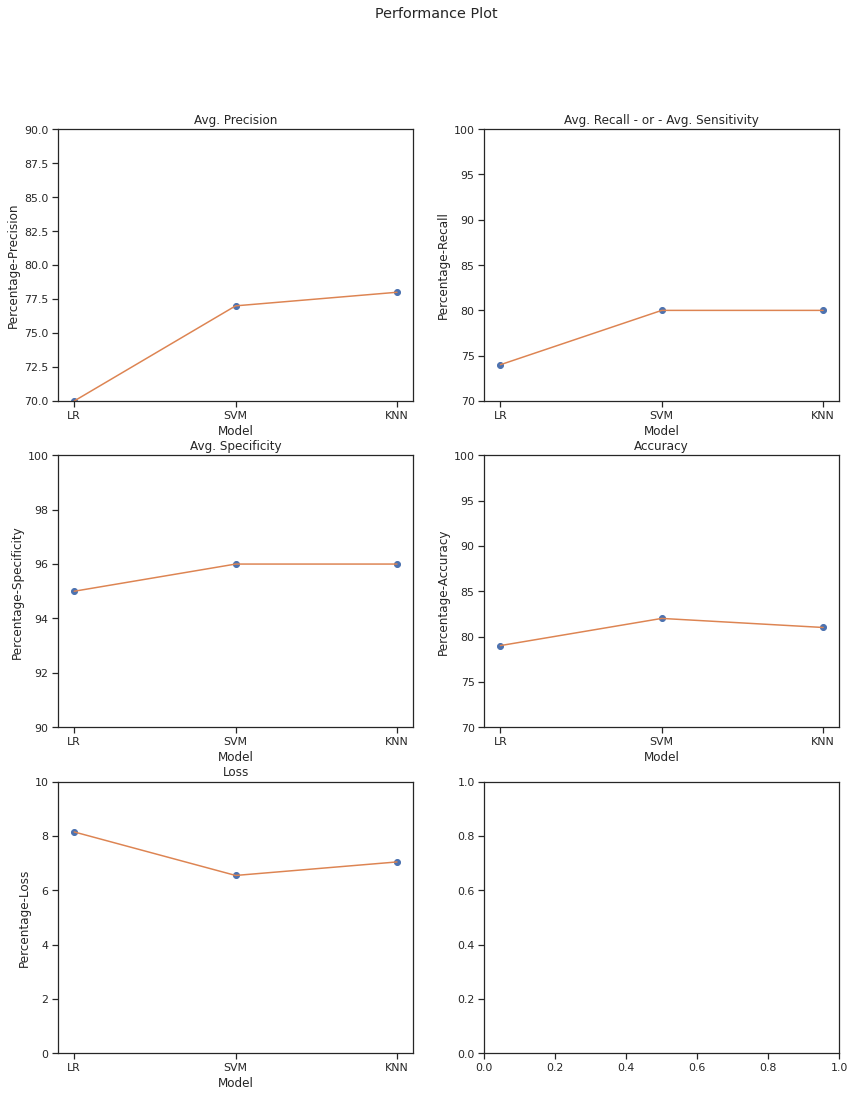

In [84]:
fig, ((axs1,axs2),(axs3,axs4),(axs5,axs6)) = plt.subplots(3,2, figsize=(14, 17))
fig.suptitle('Performance Plot')

axs1.plot(performance.Model,performance.Average_Precision,'o')
axs1.plot(performance.Model,performance.Average_Precision)
axs1.set_title('Avg. Precision')
axs1.set_ylim((70,90))
axs1.set_ylabel('Percentage-Precision')
axs1.set_xlabel('Model')

axs2.plot(performance.Model,performance.Average_Recall,'o')
axs2.plot(performance.Model,performance.Average_Recall)
axs2.set_title('Avg. Recall - or - Avg. Sensitivity')
axs2.set_ylim((70,100))
axs2.set_ylabel('Percentage-Recall')
axs2.set_xlabel('Model')

axs3.plot(performance.Model,performance.Average_Specificity,'o')
axs3.plot(performance.Model,performance.Average_Specificity)
axs3.set_title('Avg. Specificity')
axs3.set_ylim((90,100))
axs3.set_ylabel('Percentage-Specificity')
axs3.set_xlabel('Model')

axs4.plot(performance.Model,performance.Accuracy,'o')
axs4.plot(performance.Model,performance.Accuracy)
axs4.set_title('Accuracy')
axs4.set_ylim((70,100))
axs4.set_ylabel('Percentage-Accuracy')
axs4.set_xlabel('Model')

axs5.plot(performance.Model,performance.Loss,'o')
axs5.plot(performance.Model,performance.Loss)
axs5.set_title('Loss')
axs5.set_ylim((0,10))
axs5.set_ylabel('Percentage-Loss')
axs5.set_xlabel('Model')

This makes KNN the model of choice and this was also the expected outcome.

In [85]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import roc_curve,auc

In [86]:
KNN=OneVsRestClassifier(knn)
KNN.fit(X_train,y_train)
y_pred_KNN =KNN.predict(X_test)
pred_prob_KNN = KNN.predict_proba(X_test)



LR=OneVsRestClassifier(model_logistic)
LR.fit(X_train,y_train)
y_pred_LR =LR.predict(X_test)
pred_prob_LR = LR.predict_proba(X_test)



SVM=OneVsRestClassifier(model_svm)
SVM.fit(X_train,y_train)
y_pred_SVM =SVM.predict(X_test)
pred_prob_SVM = SVM.predict_proba(X_test)

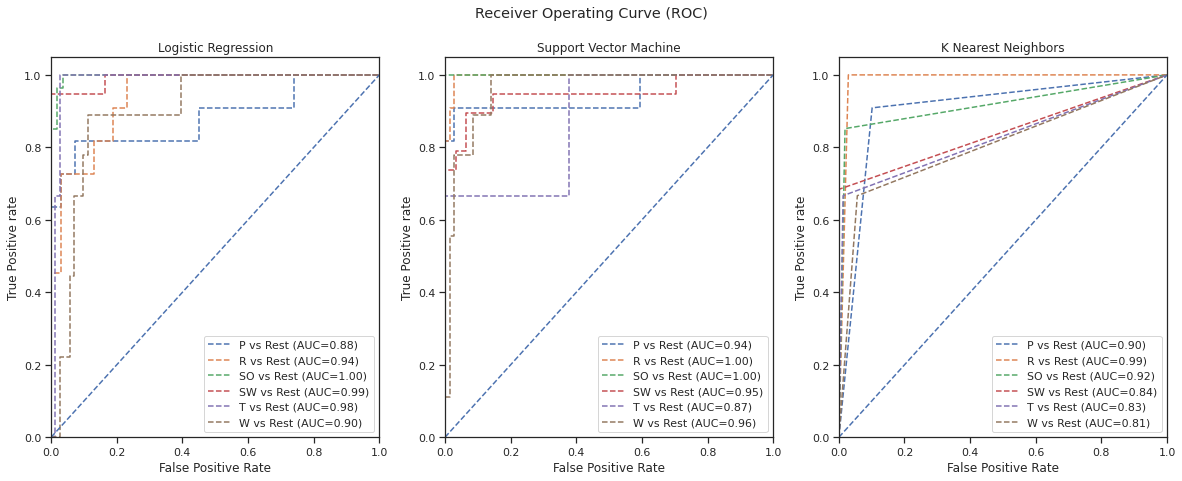

In [87]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# Figure Setting for Subplots

fig, (axs1,axs2,axs3) = plt.subplots(1,3, figsize=(20, 7))
fig.suptitle('Receiver Operating Curve (ROC)')

# roc curves for Logistic Regression
fpr_LR = {}
tpr_LR = {}
thresh_LR ={}
roc_auc_LR = dict()
# roc curves for Support Vector Machine
fpr_SVM = {}
tpr_SVM = {}
thresh_SVM ={}
roc_auc_SVM = dict()
# roc curves for K Nearest Neighbors
fpr_KNN = {}
tpr_KNN = {}
thresh_KNN ={}
roc_auc_KNN = dict()

n_class = label.classes_.shape[0]


for i in range(n_class):    
    fpr_LR[i], tpr_LR[i], thresh_LR[i] = roc_curve(y_test_binarized[:,i], pred_prob_LR[:,i])
    roc_auc_LR[i] = auc(fpr_LR[i], tpr_LR[i])# creating roc curve for LR
    
    fpr_SVM[i], tpr_SVM[i], thresh_SVM[i] = roc_curve(y_test_binarized[:,i], pred_prob_SVM[:,i])
    roc_auc_SVM[i] = auc(fpr_SVM[i], tpr_SVM[i])# creating roc curve for SVM
    
    fpr_KNN[i], tpr_KNN[i], thresh_KNN[i] = roc_curve(y_test_binarized[:,i], pred_prob_KNN[:,i])
    roc_auc_KNN[i] = auc(fpr_KNN[i], tpr_KNN[i])# creating roc curve for KNN
    
    
    # plotting  

    axs1.plot(fpr_LR[i], tpr_LR[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_LR[i]))
    
    axs2.plot(fpr_SVM[i], tpr_SVM[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_SVM[i]))

    axs3.plot(fpr_KNN[i], tpr_KNN[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(label.classes_[i],roc_auc_KNN[i]))

#Setting axis for the plots

axs1.plot([0,1],[0,1],'b--')
axs1.set_xlim([0,1])
axs1.set_ylim([0,1.05])
axs1.set_title('Logistic Regression')
axs1.set_xlabel('False Positive Rate')
axs1.set_ylabel('True Positive rate')
axs1.legend(loc='lower right')
    
axs2.plot([0,1],[0,1],'b--')
axs2.set_xlim([0,1])
axs2.set_ylim([0,1.05])
axs2.set_title('Support Vector Machine')
axs2.set_xlabel('False Positive Rate')
axs2.set_ylabel('True Positive rate')
axs2.legend(loc='lower right')

axs3.plot([0,1],[0,1],'b--')
axs3.set_xlim([0,1])
axs3.set_ylim([0,1.05])
axs3.set_title('K Nearest Neighbors')
axs3.set_xlabel('False Positive Rate')
axs3.set_ylabel('True Positive rate')
axs3.legend(loc='lower right')

The AUC is used to determine which model gives better result at what value of threshold. The greater the area under the curve, the better the model is. But this kind of analysis is more useful in case of binary classification. In our case, we have 6 classes for each model. What we can do is to create an ROC curve for each class, whith respect to all the reamaining classes (One vs Rest), and then find the ares under all these curves respectively, which is what we have done in the above image. If the detection of a certain class of bird is more important than others, we can compare that class for each model and see which model gives a better result for that class depending on the AUC value. Also for an over-all observation, we can say that the model that has higher number of AUC with greater/reasonable values performs better than the other two. Forexample, If we wanted to have better observations for just the Swimming Birds, the values of AUC are 0.89, 0.99, and 0.98 for KNN, LR, and SVM respectively. This suggests that LR gives the best results in this case. But if we observe carefully, all  have an average AUC value more than 90%. As for our model we need more number of ture possitives as compared to false negatives, we would consider choosing a model that has a point as close as possible to the uper left corner of the plot which in this case is KNN.